In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd


In [4]:
ds=load_breast_cancer()
x=pd.DataFrame(ds.data,columns=ds.feature_names)
y=ds.target
print(x.head())
print(y)

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension           ...             worst radius  \
0                 0.0787

In [5]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=0)

In [39]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(criterion='entropy',max_depth=4,)
clf.fit(X_train,y_train)
clf.score(X_train,y_train)

0.9835680751173709

In [33]:
clf.score(X_test,y_test)

0.8741258741258742

In [34]:
pd.DataFrame({'feature':x.columns,'importance':clf.feature_importances_})

feature  importance
0               mean radius    0.000000
1              mean texture    0.009689
2            mean perimeter    0.000000
3                 mean area    0.000000
4           mean smoothness    0.000000
5          mean compactness    0.000000
6            mean concavity    0.000000
7       mean concave points    0.711601
8             mean symmetry    0.000000
9    mean fractal dimension    0.000000
10             radius error    0.019480
11            texture error    0.000000
12          perimeter error    0.000000
13               area error    0.016761
14         smoothness error    0.017502
15        compactness error    0.000000
16          concavity error    0.000000
17     concave points error    0.000000
18           symmetry error    0.000000
19  fractal dimension error    0.000000
20             worst radius    0.040584
21            worst texture    0.067060
22          worst perimeter    0.000000
23               worst area    0.073151
24         worst smoothness    0.000000
25        worst compactness    0.034211
26          worst concavity    0.009960
27     worst concave points    0.000000
28           worst symmetry    0.000000
29  worst fractal dimension    0.000000

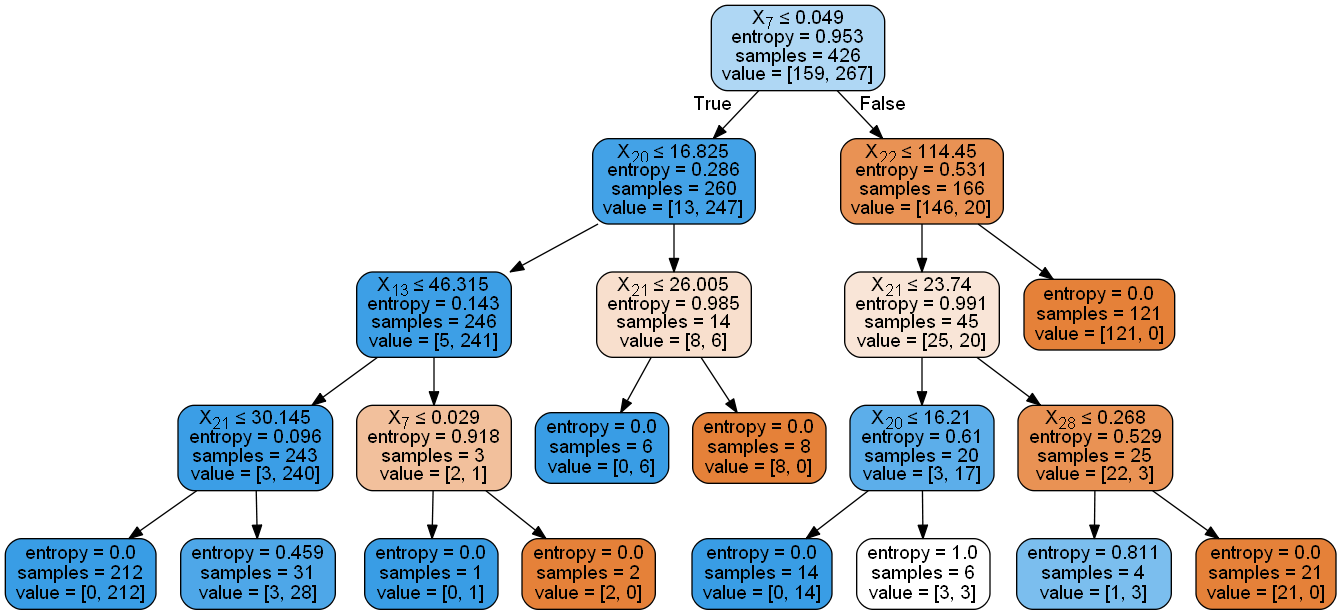

In [37]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())
